### 데이터 수집
- 서울 열린 데이터 광장 홈페이지 (https://data.seoul.go.kr/)
 - 서울시 주민등록인구(구별) 통계
 - 서울시 자치구 년도별 CCTV 설치 현황
 - 서울시 5대 범죄 발생현황 통계

In [1]:
import seaborn as sns

sns.set(font_scale=1) # seaborn 기초 세팅

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['axes.unicode_minus'] = False # " - " 기호 Unicode 처리
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정

In [68]:
import warnings
warnings.simplefilter("ignore")

# 1. CCTV 설치 현황

In [14]:
cctv = pd.read_csv("../../data/dataset/서울시CCTV설치운영현황(자치구)_년도별_211231기준.csv", encoding="cp949", skiprows=[0, 2], thousands=',')
cctv.head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,1715,815,NaN,NaN,195,150,0,261,85,9,200,0
1,중 구,2447,16,114.0,87.0,77,236,240,372,386,155,361,403
2,용산구,2611,34,71.0,234.0,125,221,298,351,125,307,617,228
3,성동구,3829,163,144.0,208.0,107,325,255,967,415,490,472,283
4,광진구,3211,35,57.0,100.0,187,98,52,675,465,712,175,655


In [15]:
cctv.shape

(25, 13)

In [17]:
cctv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   구분        25 non-null     object 
 1   총계        25 non-null     int64  
 2   2012년 이전  25 non-null     int64  
 3   2012년     24 non-null     float64
 4   2013년     24 non-null     float64
 5   2014년     25 non-null     int64  
 6   2015년     25 non-null     int64  
 7   2016년     25 non-null     int64  
 8   2017년     25 non-null     int64  
 9   2018년     25 non-null     int64  
 10  2019년     25 non-null     int64  
 11  2020년     25 non-null     int64  
 12  2021년     25 non-null     int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 2.7+ KB


### 데이터 전처리

#### 1 ) NaN 처리 - 0으로 채우기

In [19]:
cctv.fillna(0, inplace=True)
cctv.head()

,구분,총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,1715,815,0.0,0.0,195,150,0,261,85,9,200,0
1,중 구,2447,16,114.0,87.0,77,236,240,372,386,155,361,403
2,용산구,2611,34,71.0,234.0,125,221,298,351,125,307,617,228
3,성동구,3829,163,144.0,208.0,107,325,255,967,415,490,472,283
4,광진구,3211,35,57.0,100.0,187,98,52,675,465,712,175,655


#### 2 ) 컬럼명 변경
- 구분 => 구 별, 총계 => cctv 총계

In [27]:
cctv.rename({'구분':'구 분', '총계':'cctv 총계'}, axis=1, inplace=True)
cctv.head(3)

,구 분,cctv 총계,2012년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년
0,종로구,1715,815,0.0,0.0,195,150,0,261,85,9,200,0
1,중 구,2447,16,114.0,87.0,77,236,240,372,386,155,361,403
2,용산구,2611,34,71.0,234.0,125,221,298,351,125,307,617,228


#### 3 ) 2019년 이전 컬럼 생성
- 2012년 이전 ~ 2019년 데이터 합

In [41]:
cctv['2019년 이전'] = cctv.iloc[:,2:-2].T.sum()

In [43]:
cctv.drop(columns=['2019년 이전'], inplace=True)

In [49]:
# cctv['2019년 이전'] = cctv[cctv.columns.difference(['구 분','cctv 총계', '2020년', '2021년'])].sum(axis=1)

#### 2019년 이전 컬럼 삭제

In [51]:
cctv.drop(columns=cctv.columns.difference(['구 분','cctv 총계', '2020년', '2021년', '2019년 이전']), inplace=True)

#### 4 ) ETC...

In [86]:
cctv.iloc[1, 0] = '중구'

> ## EDA

#### 1) 구별 CCTV 가 가장 적게 설치되어 있는 구

In [52]:
cctv.sort_values('cctv 총계').head(1)

,구 분,cctv 총계,2020년,2021년,2019년 이전
0,종로구,1715,200,0,1515.0


#### 2) 구별 CCTV 가 가장 많이 설치되어 있는 구

In [80]:
cctv.sort_values('cctv 총계').tail(1)

,구 분,cctv 총계,2020년,2021년,2019년 이전
22,강남구,6871,926,516,5429.0


# 2. 서울시 구별 인구 통계

In [81]:
pop_data = pd.read_excel("../../data/dataset/서울시구별인구통계.xls", skiprows=[0,1,3])
pop = pop_data[['자치구', '계', '계.1', '계.2', '65세이상고령자']]
pop.head(3)

,자치구,계,계.1,계.2,65세이상고령자
0,종로구,153684,144275,9409,28064
1,중구,131450,122173,9277,24742
2,용산구,236518,222169,14349,39461


In [82]:
pop.rename({'자치구':'구 분', '계':'총인구', '계.1':'한국인', '계.2':'외국인', '65세이상고령자':'고령자'}, axis=1, inplace=True)
pop.head(1)

,구 분,총인구,한국인,외국인,고령자
0,종로구,153684,144275,9409,28064


> ## EDA

#### 1) 외국인이 가장 많은 거주 구

In [83]:
pop.sort_values('외국인', ascending=False).head(1)

,구 분,총인구,한국인,외국인,고령자
16,구로구,419984,396017,23967,73864


#### 2) 고령자가 가장 많은 거주 구

In [84]:
pop.sort_values('고령자', ascending=False).head(1)

,구 분,총인구,한국인,외국인,고령자
23,송파구,668261,662607,5654,99854


---

#### CCTV 설치 대수 대비 범죄율 파악
- 서울시 구별 인구 + cctv merge

In [93]:
seoul = pd.merge(pop, cctv, on='구 분')

#### 구 분 컬럼을 인덱스로 설정

In [115]:
seoul.set_index('구 분', inplace=True)

#### 1 인당 cctv 비율 컬럼을 생성

In [95]:
seoul['1인당 cctv비율'] = seoul['cctv 총계'] / seoul['총인구'] * 100

In [96]:
seoul.head()

,구 분,총인구,한국인,외국인,고령자,cctv 총계,2020년,2021년,2019년 이전,1인당 cctv비율
0,종로구,153684,144275,9409,28064,1715,200,0,1515.0,1.115926
1,중구,131450,122173,9277,24742,2447,361,403,1683.0,1.861544
2,용산구,236518,222169,14349,39461,2611,617,228,1766.0,1.103933
3,성동구,291609,285073,6536,46896,3829,472,283,3074.0,1.313060
4,광진구,353110,340707,12403,52604,3211,175,655,2381.0,0.909348


#### 상관관계
- 변수간의 관계의 정도와 방향을 수치로 요약해주는 지표
- 상관계수는 -1 ~ 1 사이의 값으로 나타냄
- 0 에 가까울수록 상관관계도는 낮아지며, -1이나 +1 에 가까울 수록 상관관계도가 높아짐
- 증감의 방향이 + 인경우 긍정적인 상관관계, - 인경우에는 부정적인 상관관계가 있다고 봄

**총인구와 cctv 총대수 상관관계**

In [99]:
seoul['총인구'].corr(seoul['cctv 총계'], method='spearman')

0.48461538461538467

**외국인과 cctv 총대수 상관관계**

In [101]:
seoul['외국인'].corr(seoul['cctv 총계'], method='spearman')

0.05615384615384616

#### 시각화 - 1인당 cctv 비율 bar 차트

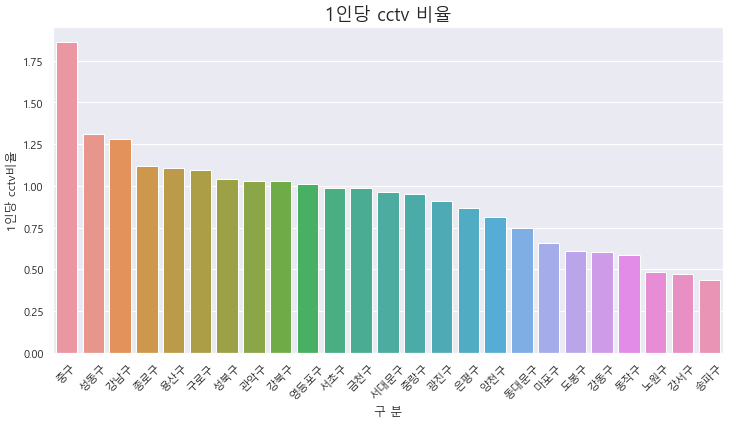

In [117]:
plt.figure(figsize=(12,6))
plt.title('1인당 cctv 비율', fontsize=18)
sns.barplot(data=seoul, y='1인당 cctv비율', x=seoul.index, order=seoul['1인당 cctv비율'].sort_values(ascending=False).index)
plt.xticks(rotation=45)
plt.show();

# 3. 범죄율

In [134]:
crime = pd.read_excel("../../data/dataset/서울시5대범죄.xls", skiprows=[0,2], usecols=['자치구', '발생', '검거'])
crime.head()

,자치구,발생,검거
0,종로구,3102,3343
1,중구,3411,2323
2,용산구,2969,2056
3,성동구,2362,1774
4,광진구,3601,2511


#### 1) 컬럼명 변경
- '구 분', '범죄건', '검거건'

In [135]:
crime.columns = ['구 분', '범죄건', '검거건']

In [136]:
crime.head(3)

,구 분,범죄건,검거건
0,종로구,3102,3343
1,중구,3411,2323
2,용산구,2969,2056


#### 2) 구별 인덱스 설정

In [137]:
crime.set_index('구 분', inplace=True)
crime.head(1)

,범죄건,검거건
구 분,,
종로구,3102,3343


#### 3) 검거율 컬럼 생성
- 검거건 / 범죄건 * 100

In [140]:
crime['검거율'] = (crime['검거건'] / crime['범죄건']) * 100

In [141]:
crime.head(3)

,범죄건,검거건,검거율
구 분,,,
종로구,3102,3343,107.769181
중구,3411,2323,68.103196
용산구,2969,2056,69.248905


#### 4) seoul / crime concat

In [145]:
merge_crime = pd.concat([seoul, crime], axis=1)

Text(0.5, 0, '검거건/범죄건')

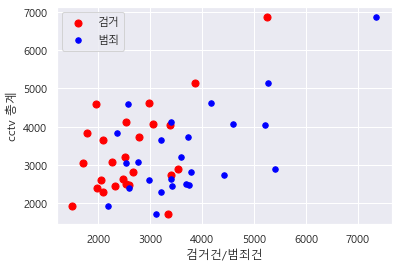

In [148]:
ax1 = merge_crime.plot.scatter(x='검거건', y='cctv 총계', color='red', s=50, label='검거')
merge_crime.plot.scatter(x='범죄건', y='cctv 총계', color='blue', s=30, label='범죄', ax=ax1)
plt.xlabel('검거건/범죄건')